In [ ]:
# -*- coding: utf-8 -*-
"""LogisticRegression_Multiclass.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1anBybVXILenh0a_R4aM_ZemLrEqYWnJl
"""

# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the Iris dataset
zoo =  pd.read_csv("/content/drive/MyDrive/ML_LAB/Lab-3/zoo-data.csv")
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [ ]:
# Check the first few rows of the dataset
zoo.head()

# Check for missing values in the dataset
print(zoo.isnull().sum())

# Check the types of each column
print(zoo.dtypes)


animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64
animal_name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
class_type      int64
dtype: object


In [ ]:
zoo = zoo.dropna()  # Drop rows with missing values
zoo = zoo.drop('animal_name', axis=1)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy of the model: 0.95


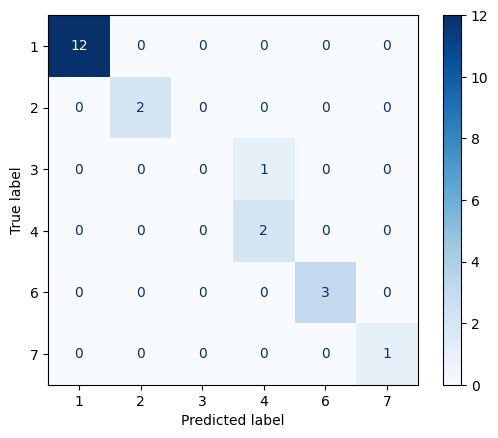

    True Class  Predicted Class
84           1                1
55           1                1
66           1                1
67           1                1
45           1                1
39           6                6
22           1                1
44           1                1
10           1                1
0            1                1
18           4                4
30           6                6
97           6                6
33           2                2
77           7                7
4            1                1
93           1                1
78           2                2
12           4                4
31           1                1
76           3                4


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming the dataset is loaded and 'class_type' is the target variable
X = zoo.drop('class_type', axis=1)  # Features (the columns used to predict)
y = zoo['class_type']  # Target (class of animals)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy:.2f}")

# Get the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Get unique labels of y_test for display
unique_labels = sorted(y_test.unique())  # Sorted to make sure they are in order

# Create confusion matrix display
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=unique_labels)

# Plot confusion matrix
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

# Misclassifications
misclassified_samples = pd.DataFrame({
    'True Class': y_test,
    'Predicted Class': y_pred
})

print(misclassified_samples)
